<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/T_vgg16_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0

--2021-05-11 09:14:49--  https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda [following]
--2021-05-11 09:14:49--  https://www.dropbox.com/sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc13c83bb702f7778fccaa0b20a.dl.dropboxusercontent.com/zip_download_get/AxqRuOAZagynlqSbRfq9kYM16zWWSS1BmOPIlJhFecpRuM_JEM2CtHSiiZC7aLGzl4-uYyzeKdhh0ShIA-hJqJU5lwuqtT0Xi4c0hjx9FGeKuA [following]
--2021-05-11 09:14:55--  https://ucc13c83bb702f7778fccaa0b20a.dl.dropboxusercontent.com/zip_download_get/AxqRuOAZagynlqSbRfq9kYM16zWWSS1BmOPIlJhFecpRuM_JEM2CtHSiiZC7aLGzl4-uYyzeKdhh0ShIA

In [3]:
!unzip  AADEmpop2CjJymIZ3QXkELpda?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: Test/Normal/NORMAL_test_615.jpg  
 extracting: Train/Covid/COVID_train_422.jpg  
 extracting: Test/Normal/NORMAL_test_300.jpg  
 extracting: Test/Normal/NORMAL_test_686.jpg  
 extracting: Train/Covid/COVID_train_284.jpg  
 extracting: Test/Normal/NORMAL_test_165.jpg  
 extracting: Test/Normal/NORMAL_test_519.jpg  
 extracting: Train/Normal/NORMAL_train_5.jpg  
 extracting: Train/Covid/COVID_train_925.jpg  
 extracting: Test/Normal/NORMAL_test_295.jpg  
 extracting: Train/Covid/COVID_train_676.jpg  
 extracting: Test/Normal/NORMAL_test_702.jpg  
 extracting: Train/Covid/COVID_train_540.jpg  
 extracting: Test/Normal/NORMAL_test_781.jpg  
 extracting: Train/Covid/COVID_train_415.jpg  
 extracting: Train/Covid/COVID_train_843.jpg  
 extracting: Train/Covid/COVID_train_583.jpg  
 extracting: Train/Covid/COVID_train_439.jpg  
 extracting: Test/Normal/NORMAL_test_420.jpg  
 extracting: Test/Normal/NORMAL_test_318.jpg  
 extracti

In [34]:
train_dir="/content/Train"
test_dir="/content/Test"
val_dir='/content/Val'


In [35]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )
val_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [36]:

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 8,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))


validation_generator = val_datagen.flow_from_directory( val_dir,
                                                        batch_size = 1,
                                                        class_mode = 'binary',
                                                        target_size = (224, 224))


test_generator = test_datagen.flow_from_directory( test_dir, 
                                                  batch_size = 1, class_mode = 'binary', 
                                                  target_size = (224, 224))

Found 5581 images belonging to 2 classes.
Found 1862 images belonging to 2 classes.
Found 1860 images belonging to 2 classes.


In [37]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), 
include_top = False,
weights = 'imagenet')

In [38]:

for layer in base_model.layers:
    layer.trainable = False

In [39]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [40]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [41]:

vgghist = model.fit(train_generator, 
                    validation_data = validation_generator,
                   epochs=10,
                    validation_steps=155
                    )

Epoch 1/10
698/698 [==============================] - 54s 76ms/step - loss: 0.5968 - acc: 0.8240 - val_loss: 0.1732 - val_acc: 0.9419
Epoch 2/10
698/698 [==============================] - 54s 77ms/step - loss: 0.1299 - acc: 0.9555 - val_loss: 0.1190 - val_acc: 0.9548
Epoch 3/10
698/698 [==============================] - 53s 76ms/step - loss: 0.0908 - acc: 0.9640 - val_loss: 0.0875 - val_acc: 0.9677
Epoch 4/10
698/698 [==============================] - 53s 76ms/step - loss: 0.0729 - acc: 0.9731 - val_loss: 0.1965 - val_acc: 0.9226
Epoch 5/10
698/698 [==============================] - 54s 77ms/step - loss: 0.0678 - acc: 0.9733 - val_loss: 0.0964 - val_acc: 0.9484
Epoch 6/10
698/698 [==============================] - 52s 75ms/step - loss: 0.0580 - acc: 0.9779 - val_loss: 0.1233 - val_acc: 0.9677
Epoch 7/10
698/698 [==============================] - 53s 76ms/step - loss: 0.0358 - acc: 0.9882 - val_loss: 0.1027 - val_acc: 0.9806
Epoch 8/10
698/698 [==============================] - 53s 77ms

Text(0.5, 1.0, 'Accuracy Evolution')

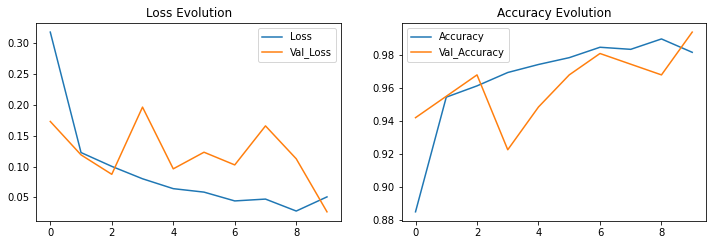

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(vgghist.history['loss'], label='Loss')
plt.plot(vgghist.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(vgghist.history['acc'], label='Accuracy')
plt.plot(vgghist.history['val_acc'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [43]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

1860/1860 [==============================] - 19s 10ms/step - loss: 0.0759 - acc: 0.9720
Test Accuracy: 97.20%
698/698 [==============================] - 49s 70ms/step - loss: 0.0112 - acc: 0.9968
Train Accuracy: 99.68%


In [47]:
predicted_vals = model.predict(test_generator, steps=len(test_generator))

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(confusion_matrix(test_generator.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test_generator.classes, predicted_vals > 0.5, output_dict=True))

[[468 462]
 [440 490]]


,0,1,accuracy,macro avg,weighted avg
precision,0.515419,0.514706,0.515054,0.515062,0.515062
recall,0.503226,0.526882,0.515054,0.515054,0.515054
f1-score,0.509249,0.520723,0.515054,0.514986,0.514986
support,930.000000,930.000000,0.515054,1860.000000,1860.000000
